<h1 align="center"><font color="#1DB954">Spotify Playlist Visualisation</font></h1>

I saw [an interesting post](https://towardsdatascience.com/discovering-your-music-taste-with-python-and-spotify-api-b51b0d2744d) that charted out playlist using radial charts. 
I hadn't ever seen or used spotify data so this seemed a great way to get started, and this post introduced me to a lot of things that I hadn't come across before such as scaling with sklearn. 

The post was vital for me to work out how to connect to Spotify's API, and to help processing the data into a useable dataframe, but I wanted to expand on it to make it basically a machine to spit out a graph for any playlist you choose with minimal repetition of code required. 

What I learnt/put into practise

- Functions & collating functions using output from previousto make one queen function to do all the work for you 💅
- Classes - did a lesson on them and souldn't work out how they could be usedful - turns out they can! 
- Scaling with SK learn. Good for radial visualisations, but also for machine learning later on. 
- Plotting something other than a super simple bar chart.


Imformation for getting the playlist id can be found [in detail here:](https://developer.spotify.com/documentation/web-api/concepts/spotify-uris-ids)

But basically take what is after _playlist/_ up until the _?_
https://open.spotify.com/playlist/5AeHw4rLSNrq4dNZ1RtnaQ?si=1018f4bd31744940 


<h2 align="center"> <font color="#1DB954">How can you use it?</font></h2> 

Save your playlist into the playilst class in step #1. 

Then after you have run everything else, you can go down right to the bottom and run the queen function: make_chart(playlist_name) to get your cute chart. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
#Importing spotify integration and setting variables for the connection

import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '4ba78ea5e22946bc84446f9bb9ca0d9c'
client_secret = 'e9686ac736484d20a1c13ceff2c386ae'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

<h2 align="left"> <font color="#000000"> Step #1.</font></h2> 

Creating a class called Playlist so it can be a function argument.

Adding new playlists should be done here.

In [116]:
class Playlist:
  def __init__(self, name, id):
    self.name = name
    self.id = id
    
for_singing = Playlist("For Singing", 'spotify:playlist:3iL5Fg17rPVwZUqw4T4xCT')
stay_in_and_paint = Playlist("Stay in and Paint", '0h5CION6YSBBeFJjXCEsmh')
oulton_faves = Playlist("Oulton Faves",'1jSUFuQobqDF1s3fjGHa4X')
mammy = Playlist("Mammy", '0RvPPrTTGWWDiprbsvekct')
oj = Playlist("", '5AeHw4rLSNrq4dNZ1RtnaQ') # podcasts are stored differently, this won't work
talky = Playlist("Talky", '1sbhq1phWR4PEl6n7pt3AP')
discover_01 = Playlist("Discover 29.05.2023", '2OKeITQx2Gnd7cHDzuXpCb')


In [117]:
#testing they work
print(str(mammy.id))
print(type(mammy.id))

0RvPPrTTGWWDiprbsvekct
<class 'str'>


<h2 align="left"> <font color="#000000"> Step #2.</font></h2> 

Convert playlist into df with all required information
The first part of this code is almost directly from the initial blogpost - getting the metadata and combining the datasets. 
The differences are I edited to enter the playlist class info instead.
I also turned it into a function  so I can call it with my playlist as an argument.

In [118]:
def get_playlist_info(playlist_in):

    results = sp.playlist(playlist_in.id)
    ids=[]

    for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
    song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

    for song_id in ids:
        meta = sp.track(song_id)
        song_meta['id'].append(song_id)
        album=meta['album']['name']
        song_meta['album']+=[album]
        song=meta['name']
        song_meta['name']+=[song]
        s = ', '
        artist=s.join([singer_name['name'] for singer_name in meta['artists']])
        song_meta['artist']+=[artist]
        explicit=meta['explicit']
        song_meta['explicit'].append(explicit)
        popularity=meta['popularity']
        song_meta['popularity'].append(popularity)

    song_meta_df=pd.DataFrame.from_dict(song_meta)
    features = sp.audio_features(song_meta['id'])
    features_df=pd.DataFrame.from_dict(features)
    features_df['duration_ms']=features_df['duration_ms']/60000
    playlist_out=song_meta_df.merge(features_df)
    return playlist_out  

In [119]:
# test
df_mammy = get_playlist_info(mammy)
df_mammy

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,04y7iJXobJhXuxLhC91LAd,Grand National,Better Than,John Butler Trio,False,49,0.640,0.817,7,-5.636,...,0.000098,0.1890,0.772,108.185,audio_features,spotify:track:04y7iJXobJhXuxLhC91LAd,https://api.spotify.com/v1/tracks/04y7iJXobJhX...,https://api.spotify.com/v1/audio-analysis/04y7...,3.460000,4
1,4Y8vb1uy9IjM2V1hqvrAid,Tarzan (Original Motion Picture Soundtrack),You'll Be In My Heart,Phil Collins,False,69,0.568,0.748,8,-6.540,...,0.000002,0.0947,0.623,96.590,audio_features,spotify:track:4Y8vb1uy9IjM2V1hqvrAid,https://api.spotify.com/v1/tracks/4Y8vb1uy9IjM...,https://api.spotify.com/v1/audio-analysis/4Y8v...,4.278883,4
2,7INi4pMPG4IE0Smx5y4KVf,Chinese Wall,Easy Lover,"Philip Bailey, Phil Collins",False,70,0.749,0.699,1,-13.108,...,0.001920,0.0763,0.935,128.904,audio_features,spotify:track:7INi4pMPG4IE0Smx5y4KVf,https://api.spotify.com/v1/tracks/7INi4pMPG4IE...,https://api.spotify.com/v1/audio-analysis/7INi...,5.075117,4
3,2RlgNHKcydI9sayD2Df2xp,Out of the Blue,Mr. Blue Sky,Electric Light Orchestra,False,83,0.388,0.338,10,-10.054,...,0.000004,0.2480,0.478,177.765,audio_features,spotify:track:2RlgNHKcydI9sayD2Df2xp,https://api.spotify.com/v1/tracks/2RlgNHKcydI9...,https://api.spotify.com/v1/audio-analysis/2Rlg...,5.056217,4
4,2374M0fQpWi3dLnB54qaLX,Toto IV,Africa,TOTO,False,86,0.671,0.373,9,-18.064,...,0.000080,0.0481,0.732,92.718,audio_features,spotify:track:2374M0fQpWi3dLnB54qaLX,https://api.spotify.com/v1/tracks/2374M0fQpWi3...,https://api.spotify.com/v1/audio-analysis/2374...,4.931550,4
5,6XK6Zw6JkFsHXzAcMWNiIr,When I Woke,Send Me On My Way,Rusted Root,False,71,0.500,0.704,0,-8.797,...,0.000018,0.1380,0.722,119.463,audio_features,spotify:track:6XK6Zw6JkFsHXzAcMWNiIr,https://api.spotify.com/v1/tracks/6XK6Zw6JkFsH...,https://api.spotify.com/v1/audio-analysis/6XK6...,4.389333,4
6,4o6BgsqLIBViaGVbx5rbRk,Voices,You Make My Dreams (Come True),Daryl Hall & John Oates,False,81,0.751,0.501,5,-12.151,...,0.112000,0.0467,0.902,167.057,audio_features,spotify:track:4o6BgsqLIBViaGVbx5rbRk,https://api.spotify.com/v1/tracks/4o6BgsqLIBVi...,https://api.spotify.com/v1/audio-analysis/4o6B...,3.177117,4
7,0qxYx4F3vm1AOnfux6dDxP,Graceland (25th Anniversary Deluxe Edition),You Can Call Me Al,Paul Simon,False,78,0.776,0.763,5,-8.124,...,0.006470,0.0770,0.820,128.433,audio_features,spotify:track:0qxYx4F3vm1AOnfux6dDxP,https://api.spotify.com/v1/tracks/0qxYx4F3vm1A...,https://api.spotify.com/v1/audio-analysis/0qxY...,4.666667,4
8,3Cx4yrFaX8CeHwBMReOWXI,Storm Front,We Didn't Start the Fire,Billy Joel,False,77,0.712,0.967,7,-5.206,...,0.000000,0.3560,0.895,145.024,audio_features,spotify:track:3Cx4yrFaX8CeHwBMReOWXI,https://api.spotify.com/v1/tracks/3Cx4yrFaX8Ce...,https://api.spotify.com/v1/audio-analysis/3Cx4...,4.795550,4
9,5IMtdHjJ1OtkxbGe4zfUxQ,Partners In Crime,Escape (The Pina Colada Song),Rupert Holmes,False,78,0.836,0.509,0,-13.668,...,0.000004,0.0436,0.949,138.714,audio_features,spotify:track:5IMtdHjJ1OtkxbGe4zfUxQ,https://api.spotify.com/v1/tracks/5IMtdHjJ1Otk...,https://api.spotify.com/v1/audio-analysis/5IMt...,4.608217,4


<h2 align="left"> <font color="#000000"> Step #3.</font></h2> 

Isolate the scaleable features of the playlist object. 
It crossed my mind that this (along with step #4 could both be included in the get_playlist_info function, however firstly I think it's nice to have the main dataset to check, and potentially use for different analysis, and also separate functions means it might be easier to work out what is happening if something should go wrong. As I am combining all the functions at the end anyway, it doesn't seem to add any benefit to combine them at this stage.)

In [120]:
def get_subset(playlist):
    scaleable_features = playlist[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'
                          , 'valence', 'tempo', 'duration_ms']]
    return scaleable_features

In [127]:
# testing
# had to rename it - apparently I can't spell scaleable right?? Best to have variables I won't spell wrong I suppose.
subset_mammy = get_subset(df_mammy)
print(subset_mammy)

    danceability  energy  loudness  speechiness  acousticness  \
0          0.640   0.817    -5.636       0.0254       0.02840   
1          0.568   0.748    -6.540       0.0299       0.06260   
2          0.749   0.699   -13.108       0.0371       0.06740   
3          0.388   0.338   -10.054       0.0329       0.65200   
4          0.671   0.373   -18.064       0.0323       0.25700   
5          0.500   0.704    -8.797       0.0695       0.12500   
6          0.751   0.501   -12.151       0.0551       0.23400   
7          0.776   0.763    -8.124       0.0534       0.18200   
8          0.712   0.967    -5.206       0.0470       0.07710   
9          0.836   0.509   -13.668       0.0548       0.46700   
10         0.555   0.650    -6.936       0.0282       0.00670   
11         0.414   0.238   -16.215       0.0306       0.79100   
12         0.402   0.114   -15.691       0.0321       0.84200   
13         0.488   0.305   -14.249       0.0379       0.71600   
14         0.601   0.574 

<h2 align="left"> <font color="#000000"> Step #4.</font></h2> 

Scaling the data subset from the previous function. 
Scaled differently to the blogpost as that didn't work for me. Researched around for a different option and landed on the following, which worked nicely as a function, and also allowed me to keep the column names, which the blogpost option also lost. 

In [121]:
from sklearn import preprocessing

def playlist_scaler(in_features):
    x = in_features.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    out_features = pd.DataFrame(x_scaled, columns=in_features.columns)
    return out_features  

In [75]:
scaled_mammy = playlist_scaler(subset_mammy)

In [76]:
# testing again, shocking that everything is working so well tbh.
print(scaled_mammy)

    danceability    energy  loudness  speechiness  acousticness  \
0       0.589431  0.824150  0.976437     0.012128      0.023734   
1       0.443089  0.743259  0.926900     0.061742      0.061140   
2       0.810976  0.685815  0.566990     0.141125      0.066390   
3       0.077236  0.262603  0.734342     0.094818      0.705786   
4       0.652439  0.303634  0.295413     0.088203      0.273761   
5       0.304878  0.691676  0.803222     0.498346      0.129389   
6       0.815041  0.453693  0.619431     0.339581      0.248605   
7       0.865854  0.760844  0.840101     0.320838      0.191731   
8       0.735772  1.000000  1.000000     0.250276      0.076999   
9       0.987805  0.463072  0.536303     0.336273      0.503445   
10      0.416667  0.628370  0.905200     0.042999      0.000000   
11      0.130081  0.145369  0.396734     0.069460      0.857815   
12      0.105691  0.000000  0.425448     0.085998      0.913595   
13      0.280488  0.223916  0.504466     0.149945      0.77578

In [128]:
#define pi for the chart
pi = np.pi

<h2 align="left"> <font color="#000000"> Step #5.</font></h2> 

Getting the scaled data into a chart
Again this is modified from the blog post linked at the start, and edited using official documentation. Also obviously But I made it a function that you can perform on the output of the previous function.

In [129]:
def make_radial_chart(music_feature, playlist_class_name):
    categories=list(music_feature.columns)
    N=len(categories)
    value=list(music_feature.mean())
    value+=value[:1]
    angles=[n/float(N)*2*pi for n in range(N)]
    angles+=angles[:1]
    fig=plt.figure(figsize=(4,5))
    ax =fig.add_subplot(111, polar=True)
    fig.patch.set_facecolor('#FFFFFF')
    ax.set_facecolor('#FFFFFF')
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(1)
    
    ax.plot(angles, value, linewidth=4)
    ax.scatter(angles, value, s=160, zorder=10)
    plt.polar(angles, value, color = '#000000')
    plt.fill(angles,value,alpha=0.3, color = "#1DB954")
    plt.title(playlist_class_name.name, size=35)

    plt.xticks(angles[:-1],categories, size=10)
    plt.yticks(color = "#b3b3b3", size=8)
    X_VERTICAL_TICK_PADDING = 1
    X_HORIZONTAL_TICK_PADDING = 50 
    graph_result = plt.show()
    return graph_result

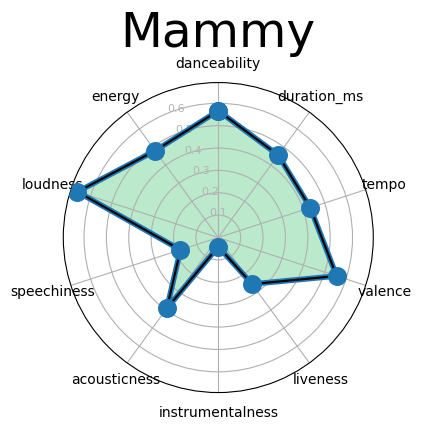

In [78]:
# test using the name of the scaled data variable, and the playlist name
make_radial_chart(scaled_mammy, mammy)



<h2 align="center"> <font color="#1DB954">Time to run it! </font></h2> 




To get a graph the whole process is the following code, which is obviously really annoying, and too much typing with room for error, so obviously it's time to make the queen function that smacks these all together in one clute little line.

 🤢 Bad : 
 
```df_singing = get_playlist_info(for_singing)
subset_singing = get_scaleable_subset(df_singing)
scaled_singing = playlist_scaler(subset_singing)
make_radial_chart(scaled_singing, for_singing)```

so let's make it better:

In [95]:
def make_chart(playlist_name):
    df_playlist = get_playlist_info(playlist_name)
    subset_playlist = get_scaleable_subset(df_playlist)
    scaled_playlist = playlist_scaler(subset_playlist)
    make_radial_chart(scaled_playlist, playlist_name)

And for the beautiful: 
💅

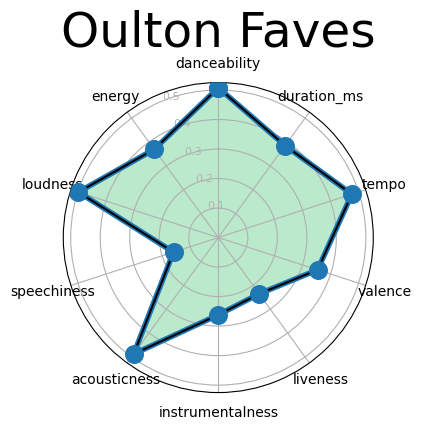

In [136]:
oulton = make_chart(oulton_faves)

Nice. Try it with your own playlists if you want. Or don't. I'm not the boss of you. 

How could the project be improved in the future? 
1. Make a function to extract the playlist id from the link and add it to the class automatically.
2. Make a subset of charts of discover weeklies for example to chart change. 
3. Plot multiple playlists on one chart with colour formatting to see change [like here](https://www.python-graph-gallery.com/web-radar-chart-with-matplotlib)